# PyCaret - Pima Indian Diabetes
PyCaret, an open source low-code machine learning library in Python, was announced on 16 April 2020. It promises to be an alternate low-code library that can be used to replace hundreds of lines of code with few words only. This makes experiments exponentially fast and efficient.

This is like a dream come true for many Data Science Engineers. I will attempt to prove or disapprove it by comparing the workflow with one of the projects I did on Pima Indian datasets. In that project, I was using XGBoost algorithm to predict the patient diabetic inclination.

In [1]:
# Email: sengtian@yahoo.com
# Dateset: dataset/pima-indians-diabetes
# Start Date: 18 April 2020

# PyCaret installation: pip install pycaret

In [2]:
import pandas as pd
import os

dataset_dir = 'dataset'
dataset_filename = 'pima-indians-diabetes.csv'

dataset_fullname = os.path.join(os.getcwd(), dataset_dir)
dataset_fullname = os.path.join(dataset_fullname, dataset_filename)

# load the data and print the first few rows
df = pd.read_csv(dataset_fullname)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# let determine how many rows and columns in the dataset
df.shape

(768, 9)

In [4]:
# import the module and initializing setup
from pycaret.classification import *

# set session id to 123 (arbitarily)
exp_clf = setup(data=df, 
                numeric_features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 
                train_size=0.75,
                session_id=123,
                target='Outcome')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.772400,0.816700,0.557600,0.742300,0.626900,0.469800
1,Linear Discriminant Analysis,0.772300,0.820400,0.557600,0.747400,0.629300,0.471100
2,Ridge Classifier,0.768900,0.000000,0.547600,0.743900,0.620800,0.461300
3,Ada Boost Classifier,0.753400,0.811400,0.571900,0.690600,0.617200,0.438600
4,Naive Bayes,0.741100,0.805600,0.581700,0.656500,0.607600,0.417100
5,CatBoost Classifier,0.739500,0.811400,0.562600,0.666400,0.598100,0.409500
6,Gradient Boosting Classifier,0.737800,0.814900,0.567400,0.660000,0.596400,0.406800
7,Extra Trees Classifier,0.736100,0.808300,0.507600,0.670700,0.564500,0.384000
8,Quadratic Discriminant Analysis,0.734200,0.801100,0.542900,0.654900,0.585000,0.394200
9,Extreme Gradient Boosting,0.730800,0.802100,0.552900,0.651500,0.588700,0.392200


In [6]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7586,0.8095,0.4762,0.7692,0.5882,0.4306
1,0.7931,0.8461,0.5000,0.8333,0.6250,0.4942
2,0.8103,0.8118,0.5000,0.9091,0.6452,0.5302
3,0.8276,0.8066,0.7000,0.7778,0.7368,0.6092
4,0.6897,0.7118,0.5000,0.5556,0.5263,0.2965
5,0.8621,0.8974,0.7500,0.8333,0.7895,0.6873
6,0.7193,0.8108,0.6500,0.5909,0.6190,0.3976
7,0.7193,0.8108,0.3500,0.7000,0.4667,0.3038
8,0.7719,0.8811,0.5000,0.7692,0.6061,0.4555
9,0.7719,0.7811,0.6500,0.6842,0.6667,0.4935


In [7]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
tuned_lr = tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7586,0.8095,0.4762,0.7692,0.5882,0.4306
1,0.7931,0.8434,0.4500,0.9000,0.6000,0.4806
2,0.8103,0.8132,0.5000,0.9091,0.6452,0.5302
3,0.8276,0.8105,0.7000,0.7778,0.7368,0.6092
4,0.6897,0.7118,0.5000,0.5556,0.5263,0.2965
5,0.8448,0.8947,0.7000,0.8235,0.7568,0.6439
6,0.7193,0.8095,0.6500,0.5909,0.6190,0.3976
7,0.6842,0.7865,0.3500,0.5833,0.4375,0.2366
8,0.7719,0.8824,0.5000,0.7692,0.6061,0.4555
9,0.7719,0.7784,0.6500,0.6842,0.6667,0.4935


In [9]:
tuned_lr

LogisticRegression(C=1.94, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

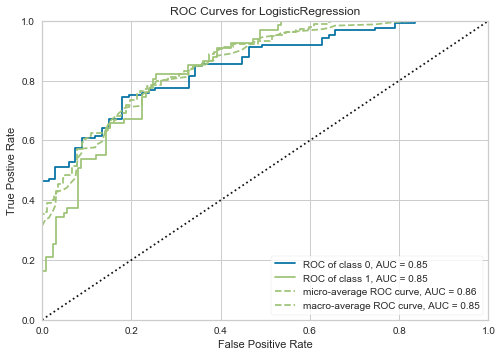

In [10]:
plot_model(tuned_lr, plot='auc')

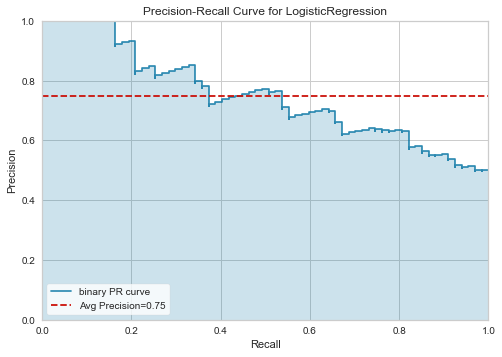

In [11]:
plot_model(tuned_lr, plot='pr')

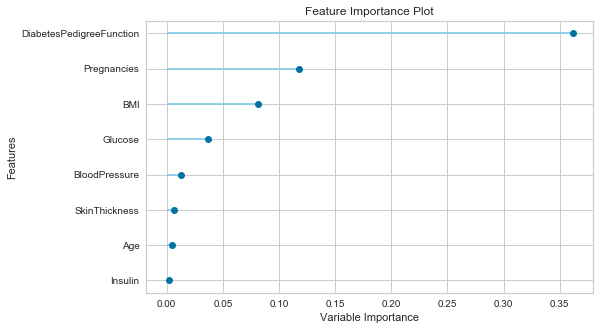

In [12]:
plot_model(tuned_lr, plot='feature')

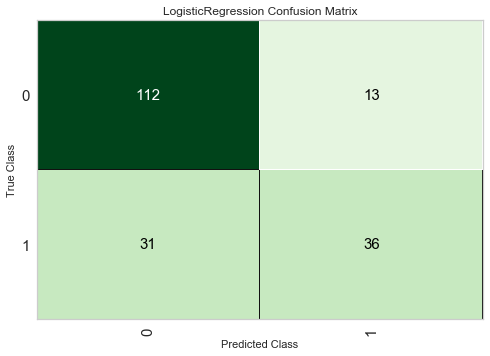

In [13]:
plot_model(tuned_lr, plot='confusion_matrix')

In [14]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [15]:
# finalize model for deployment
final_lr = finalize_model(tuned_lr)

In [16]:
final_lr

LogisticRegression(C=1.94, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
predict_model(final_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.8021,0.8767,0.597,0.7843,0.678,0.5389


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Label,Score
0,4.0,158.0,78.0,0.0,0.0,32.9,0.803,31.0,1,1,0.7335
1,1.0,90.0,68.0,8.0,0.0,24.5,1.138,36.0,0,0,0.1488
2,4.0,116.0,72.0,12.0,87.0,22.1,0.463,37.0,0,0,0.1394
3,1.0,126.0,56.0,29.0,152.0,28.7,0.801,21.0,0,0,0.3052
4,4.0,112.0,78.0,40.0,0.0,39.4,0.236,38.0,0,0,0.2972
...,...,...,...,...,...,...,...,...,...,...,...
187,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0,1,0.6271
188,2.0,105.0,58.0,40.0,94.0,34.9,0.225,25.0,0,0,0.1577
189,2.0,146.0,0.0,0.0,0.0,27.5,0.240,28.0,1,1,0.5338
190,3.0,169.0,74.0,19.0,125.0,29.9,0.268,31.0,1,1,0.5312


In [18]:
# saving the model
save_model(final_lr, 'Final Logistic_Regression_model_18-04-2020')

Transformation Pipeline and Model Succesfully Saved
